# Average by genre

## Importation de modules

In [49]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.tools import *
from src.utils.metrics import *
from src.utils.extract_data import transform_parquet_to_csv
from src.utils.metrics_plot import *
import numpy as np
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Dataframe des métriques

In [34]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

## Importation des données et mise en forme des dataframes

In [7]:
#df, le dataframe qu'on utilise avec les features décomposées
df=pd.read_csv('dataset.csv')


#variables utiles
n_titre = len(df) #nombre titres dans la base
n_audio = 256 #nombre de données audio
n_usage = 128 #nombre de données usage
n_label = 21 #nombre labels dans la base
p=1 #proportion de titres de la base utilisés

#dataframe des labels
labels = df.columns[1:22]
df_labels = pd.DataFrame(data=labels,columns=['Label'])

In [8]:
#Ajout colonne nombre de labels pour chaque titre
df=df.drop(columns = ['song_index'])
df["Nombre labels"] = df.iloc[:,0:21].sum(axis=1)

In [9]:
# df_unilabel: la base avec les titres ne comportant qu'un seul label
df= df[df["Nombre labels"] == 1]
df.drop(columns = ['Nombre labels'])

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
0,0,0,0,0,0,0,0,0,0,0,...,0.008582,-0.000024,-0.272207,0.210503,0.030972,0.080964,-0.015423,0.102148,0.365081,-0.066897
1,0,0,0,0,0,0,0,0,0,1,...,-0.182309,-0.051225,-0.004617,-0.005726,-0.038334,-0.063972,0.053881,-0.001152,0.045032,0.027505
2,0,0,0,0,1,0,0,0,0,0,...,-0.044620,-0.132282,-0.141684,-0.106271,-0.189065,-0.229804,0.083824,-0.160790,0.040417,-0.094503
3,0,0,0,0,0,0,0,0,0,1,...,-0.127573,-0.068515,-0.106374,-0.102694,-0.066937,0.026911,-0.032158,0.063670,-0.026653,-0.068251
4,0,0,0,0,0,0,0,0,0,0,...,0.024463,-0.052952,-0.059056,0.041670,-0.025673,-0.000446,-0.003438,0.060359,0.058938,0.029523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,0,0,0,1,0,0,0,0,0,...,-0.034780,0.112294,-0.084898,-0.191570,0.153120,0.106828,0.056458,0.127816,0.086341,-0.024928
50558,0,0,0,0,0,0,0,1,0,0,...,0.063418,0.166352,0.021962,0.003740,0.146321,-0.094655,-0.118755,-0.008160,-0.068332,0.041923
50559,0,0,0,0,0,0,0,0,0,0,...,-0.000624,-0.037719,0.018047,0.028091,-0.000380,0.015697,-0.035737,-0.022669,-0.003089,-0.014504
50560,0,0,0,0,0,0,0,0,0,0,...,0.063921,0.000640,-0.081422,-0.012015,-0.046315,-0.112069,0.017265,-0.063093,-0.134029,-0.007111


## Séparation train-test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

Y = df[labels]
X = df[["usage_feature_"+str(i) for i in range(1,n_usage+1)]+["audio_feature_"+str(i) for i in range(1,n_audio+1)]]
columns = X.columns
index = X.index

In [11]:
#normalisation L2 de X
X = normalize(X, norm='l2')
X = pd.DataFrame(X)
X.columns = columns
X.index=index
X

,usage_feature_1,usage_feature_2,usage_feature_3,usage_feature_4,usage_feature_5,usage_feature_6,usage_feature_7,usage_feature_8,usage_feature_9,usage_feature_10,...,audio_feature_247,audio_feature_248,audio_feature_249,audio_feature_250,audio_feature_251,audio_feature_252,audio_feature_253,audio_feature_254,audio_feature_255,audio_feature_256
0,-0.001152,-0.000603,-0.000308,-0.000937,-0.000591,0.003613,0.001785,-0.001279,0.003902,0.001582,...,-0.009191,0.136019,-0.031458,0.030521,-0.094679,-0.006749,0.019128,-0.026348,0.031680,-0.087473
1,0.000062,0.000023,-0.000343,0.001793,0.001089,-0.005083,-0.000369,-0.006073,0.002195,0.002254,...,0.035021,-0.009121,0.020994,-0.030791,-0.059712,0.009515,-0.069461,-0.012320,0.111025,-0.045204
2,-0.001274,0.000249,0.002699,0.002082,0.004371,0.001831,-0.001134,-0.007163,0.002380,0.000036,...,-0.026341,-0.007824,-0.025767,0.025758,-0.058356,0.140337,-0.031038,0.175235,-0.008969,-0.001871
3,0.001093,0.002345,0.000661,0.000134,-0.001684,-0.003185,0.001162,0.002669,0.001657,-0.008323,...,-0.026312,0.015941,-0.030031,-0.033264,-0.129863,0.009411,-0.003566,-0.043219,0.105218,-0.133631
4,0.001521,0.001977,0.000470,-0.002439,-0.003487,0.008192,0.004680,0.002229,-0.009798,-0.006628,...,-0.019374,-0.005888,-0.050258,0.043817,-0.070442,0.079896,-0.058927,-0.059168,0.010431,0.033031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,-0.000006,-0.000059,-0.000210,0.001571,0.000999,-0.001507,-0.000474,-0.012291,-0.004680,-0.001237,...,0.072490,-0.003775,-0.027386,0.015989,-0.007550,0.225186,-0.065988,0.133946,0.067022,0.013340
50558,0.002318,0.001495,-0.002373,-0.004416,0.001562,-0.000452,0.001212,-0.004830,0.007907,0.007509,...,0.052941,-0.005201,-0.021003,-0.011149,-0.070325,0.072696,-0.043616,-0.004127,0.106046,-0.085954
50559,-0.000032,0.000656,-0.000514,0.000142,-0.000841,-0.000378,-0.002937,0.001179,-0.002912,-0.002267,...,0.068145,0.018252,-0.034512,-0.025848,-0.106347,0.140916,-0.024241,0.062247,0.159617,-0.051518
50560,0.000340,-0.000455,-0.000682,0.001084,-0.005340,-0.123003,0.000223,-0.001267,0.018174,0.006628,...,-0.026898,-0.005080,-0.005331,0.013391,-0.105352,0.034541,-0.079354,0.144659,0.030325,0.032401


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=18)

In [14]:
#le dataframe d'entraînement avec les sorties Y et les features X associées à chaque titre
df_train = pd.concat([X_train, y_train], axis = 1)

## Calcul des features moyennes pour chaque label

In [15]:
#le data frame avec les features moyennes de chaque label (moyenne calculée sur l'échantillon d'entraînement)
df_moyenne = pd.DataFrame(columns=df_train.columns)
for label in labels:
    df_moyenne.loc['Average_' + label] = df_train[df_train[label] == 1].mean(axis = 0)

In [16]:
#On ne garde que les moyennes des features
df_moyenne = df_moyenne[["usage_feature_"+str(i) for i in range(1,n_usage+1)]+["audio_feature_"+str(i) for i in range(1,n_audio+1)]]
df_moyenne

,usage_feature_1,usage_feature_2,usage_feature_3,usage_feature_4,usage_feature_5,usage_feature_6,usage_feature_7,usage_feature_8,usage_feature_9,usage_feature_10,...,audio_feature_247,audio_feature_248,audio_feature_249,audio_feature_250,audio_feature_251,audio_feature_252,audio_feature_253,audio_feature_254,audio_feature_255,audio_feature_256
Average_asian,-0.001813,0.002964,0.007558,-0.013170,0.001070,-0.000551,0.013556,-0.002588,-0.015186,0.026233,...,0.070433,0.014264,0.012155,-0.103778,-0.494777,0.303398,-0.228496,0.157736,0.758998,-0.434382
Average_rnb,-0.000429,0.002114,0.000713,0.002589,-0.004937,-0.000998,0.004125,0.000734,-0.006184,-0.014059,...,0.091728,0.093325,-0.193266,0.082557,-0.266792,0.929134,-0.249044,0.188064,0.359308,-0.358009
Average_reggae,-0.000125,0.003694,0.001070,-0.001549,-0.002511,-0.000170,-0.007865,-0.003798,-0.007681,-0.011680,...,0.177879,0.012891,-0.186714,0.121273,-0.295919,0.748319,-0.324451,0.085861,0.280435,-0.128048
Average_blues,-0.006880,0.013536,-0.007689,0.023094,0.018141,-0.005343,0.035752,0.006700,-0.014854,0.009979,...,-0.028488,0.419679,0.055917,0.031609,-0.428509,0.001481,-0.042122,-0.091944,0.298054,-0.258059
Average_pop,-0.002040,0.001065,0.003561,0.004177,0.003471,-0.015551,-0.003179,-0.034894,-0.009776,-0.013419,...,0.144045,0.060368,-0.133008,-0.029596,-0.427657,0.737376,-0.268046,0.267719,0.619775,-0.327144
Average_dance,-0.000954,-0.002970,-0.001261,0.003943,0.003032,-0.003205,-0.006927,-0.034226,-0.005592,0.006795,...,0.579693,0.260924,-0.204807,-0.084701,-0.508237,1.222674,-0.292534,0.262222,0.984668,-0.373698
Average_folk,0.009136,-0.003492,-0.028744,-0.003367,0.014317,0.024601,0.005704,0.008302,0.005101,0.000165,...,0.074295,0.134905,-0.007096,-0.118201,-0.583559,0.092936,0.030518,-0.074344,0.647520,-0.491964
Average_arabic-music,0.002359,0.001243,-0.001010,-0.002260,-0.000674,0.006363,0.000769,-0.007816,0.003180,-0.003469,...,0.205268,0.023815,-0.174327,0.046922,-0.298320,0.756823,-0.339676,0.198757,0.325981,-0.112863
Average_indie,0.003918,0.003954,-0.012375,-0.002791,0.004244,0.002737,0.001995,-0.009267,-0.008083,0.003975,...,0.161380,0.100189,-0.056784,-0.126581,-0.521359,0.470913,-0.157405,0.009906,0.954994,-0.433596
Average_rock,0.003128,0.002127,-0.010163,-0.000951,0.010205,0.003641,-0.007535,-0.012942,0.002950,-0.001585,...,0.038047,0.055974,0.182052,-0.144109,-0.491067,0.096838,-0.216617,0.015642,0.941283,-0.393911


In [17]:
#le dataframe de test avec les sorties Y et les features X associées à chaque titre
df_test = pd.concat([X_test, y_test], axis = 1)
df_test.head(5)

,usage_feature_1,usage_feature_2,usage_feature_3,usage_feature_4,usage_feature_5,usage_feature_6,usage_feature_7,usage_feature_8,usage_feature_9,usage_feature_10,...,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
21054,0.011967,-0.011819,-0.049459,-0.002455,0.024134,0.017773,0.009970,0.025119,0.004892,0.016159,...,1,0,0,0,0,0,0,0,0,0
47782,-0.013764,-0.004428,0.018278,-0.006117,0.033397,-0.006854,-0.019062,-0.047000,0.038519,0.037225,...,0,0,0,0,0,0,0,0,0,0
12447,-0.001614,0.002465,0.000476,-0.000686,-0.004188,0.001361,0.013555,-0.002152,-0.008344,-0.015635,...,0,0,0,0,0,0,0,0,0,1
19272,0.002365,-0.002760,0.001047,0.007628,-0.008013,-0.005495,0.009805,-0.040013,0.008111,0.010035,...,0,0,0,0,0,0,0,0,0,0
28517,-0.001901,0.003157,0.013484,-0.013545,0.002213,-0.015621,0.011370,0.019195,0.021083,0.013702,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_test1 = df_test[["usage_feature_"+str(i) for i in range(1,n_usage+1)]+["audio_feature_"+str(i) for i in range(1,n_audio+1)]]
df_test1.shape[0]

12801

## Cosine similarity

In [19]:
def cosine1(a,b):
    A = np.array(a)
    B = np.array(b)
 
    return np.dot(A,B)/(norm(A)*norm(B))

def cosine(a,b):
    A = np.array(a)
    B = np.array(b)
 
    return norm(A-B)

## Labels prédits

In [28]:
usage = ["usage_feature_"+str(i) for i in range(1,n_usage+1)]
audio = ["audio_feature_"+str(i) for i in range(1,n_audio+1)]

def prediction(features):
    y=[]
    X_t = X_test[features]
    df_m = df_moyenne[features]
    for i in range (X_test.shape[0]):
        s=[]
        for j in range(21):
            a= cosine(df_m.iloc[j,:],X_t.iloc[i,:])
            s.append(a)
        for k in range(len(s)):
            if s[k]== min(s):
                y.append(k)

    df_hat=pd.DataFrame(columns = labels) #le data frame des valeurs prédites
    for i in range(len(y)):
        pred = [0]*21
        pred[y[i]]=1
        df_hat.loc[i]=pred
    df_hat = df_hat.astype(str).astype(int)
    df_hat.index = y_test.index
    return(df_hat)

In [29]:
df_hat_UA = prediction(audio+usage)

In [31]:
df_hat_U = prediction(usage)
df_hat_A = prediction(audio)

In [35]:
#norme euclidienne sur les tests, avec usage et audio
final_res.loc['Average by genre Usage+audio']=all_metrics(y_test.values,df_hat_UA.values)
final_res.loc['Average by genre Audio']=all_metrics(y_test.values,df_hat_A.values)
final_res.loc['Average by genre Usage']=all_metrics(y_test.values,df_hat_U.values)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Average by genre Usage+audio,0.487,0.487,0.487,0.487,0.049
Average by genre Audio,0.444,0.444,0.444,0.444,0.053
Average by genre Usage,0.795,0.795,0.795,0.795,0.019


In [78]:
def plot_roc_curve_sup(y_test,y_hat_U,y_hat_A,y_hat_UA,title,save=False,name_fig=None):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat_UA)
    fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_hat_A)
    fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_hat_U)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    roc_auc2 = metrics.auc(fpr2, tpr2)
    plt.title(title)
    plt.plot(fpr1, tpr1, 'b', label = 'AUC audio = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, 'r', label = 'AUC usage = %0.2f' % roc_auc2)
    plt.plot(fpr, tpr, 'g', label = 'AUC audio and usage= %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    if not save:
        plt.show()
    else:
        plt.savefig(name_fig)
        plt.clf()
    return([roc_auc,roc_auc1,roc_auc2])
    
        
def plot_roc_curve_all(y_test,y_hat_U,y_hat_A,y_hat_UA, algo, save, name_fig1,name_fig2):
    auc_labels_U=[]
    auc_labels_A=[]
    auc_labels_UA=[]
    #conf=multilabel_confusion_matrix(y_test,y_hat_UA)
    l = l=['asian','rnb','reggae','blues', 'pop','dance','folk','arabic-music', 'indie', 'rock', 'soulfunk', 'latin', 'classical', 'k-pop','brazilian', 'metal','rap', 'jazz','electronic','african','country']
    for i in range(len(l)): #pour chaque label, ROC curve
        AUC= plot_roc_curve_sup(y_test[:,i], y_hat_U[:,i],y_hat_A[:,i],y_hat_UA[:,i],"ROC curve "+ l[i],save=save,name_fig=name_fig1 +" "+ l[i])
        auc_labels_U.append(AUC[2])
        auc_labels_A.append(AUC[1])
        auc_labels_UA.append(AUC[0])
        #plot_confusion_matrix(conf[i],title=l[i],classes=[l[i],'Others'],normalize=True,save=save,name_fig=name_fig2) #Confusion matrix juste pour usage et fa
    graph_auc(auc_labels_U,algo+" "+"Usage",save=save,name_fig=name_fig2+" "+"Usage")
    plt.figure()
    graph_auc(auc_labels_A,algo+" "+"Audio",save=save,name_fig=name_fig2+" "+"Audio")
    plt.figure()
    graph_auc(auc_labels_UA,algo+" "+"Usage et audio",save=save,name_fig=name_fig2+" "+"Usage et audio")

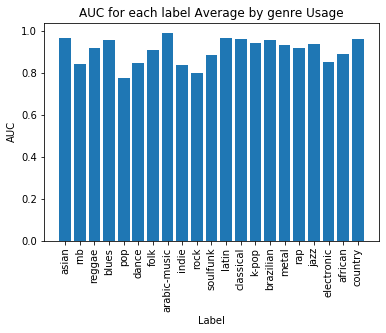

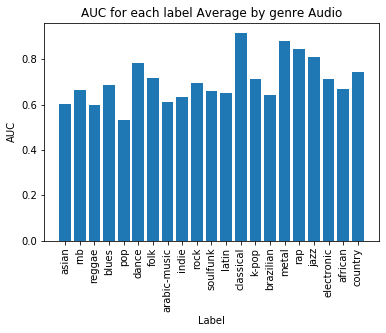

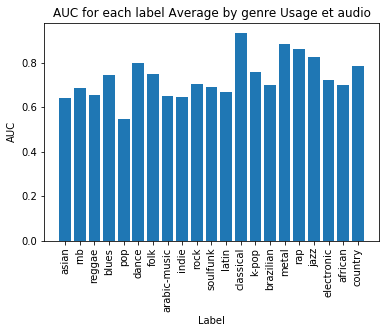

In [79]:
name_fig2=os.path.join(project_dir,'docs/Average_genre/AUC_Average_genre_audio_usage/'+label)
name_fig1= os.path.join(project_dir,'docs/Average_genre/ROC_Average_genre_audio_usage/'+label)
    
plot_roc_curve_all(y_test.values,df_hat_U.values,df_hat_A.values,df_hat_UA.values,"Average by genre", True,name_fig1,name_fig2)